In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,900 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and dire

In [ ]:
# Raw Data loading
# seoul_df = pd.read_csv('./data/seoul.csv', encoding='cp949', skiprows=7)
means_df = pd.read_csv("/content/drive/MyDrive/[AI 웹서비스 스쿨]/[머신러닝]/data/project1/means.csv", encoding="euc-kr", sep=',', index_col=None)
means_df.columns = ['순위', '지점', '인구', '비율']

display(means_df.head(5), means_df.shape)


,순위,지점,인구,비율
0,1,기타항구,4283.0,0.4
1,2,제주항구,36.0,0.0
2,3,인천항구,73.0,0.0
3,4,부산항구,5760.0,0.6
4,5,기타공항,71581.0,7.5


(9, 4)

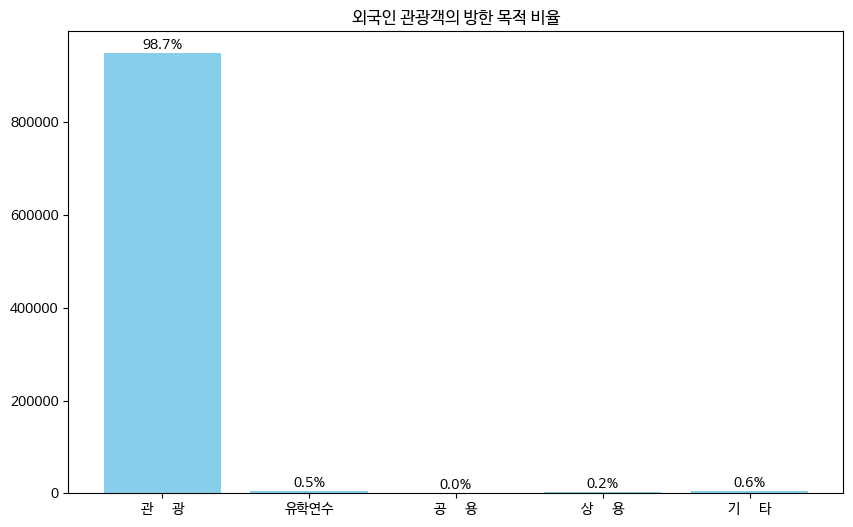

In [ ]:
# Raw Data loading

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 데이터 로드
goal_df = pd.read_csv("/content/drive/MyDrive/[AI 웹서비스 스쿨]/[머신러닝]/data/project1/goal.csv", encoding="euc-kr", sep=',', index_col=None)
goal_df.columns = ['구분','방한외래관광객', '비율']

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(goal_df["구분"], goal_df["방한외래관광객"], color='skyblue')

# 각 막대 위에 비율 값 표시
for bar, 비율 in zip(bars, goal_df["비율"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{비율}%',
             ha='center', va='bottom', fontsize=10)

# 제목 및 레이블 설정
plt.title("외국인 관광객의 방한 목적 비율")
plt.show()


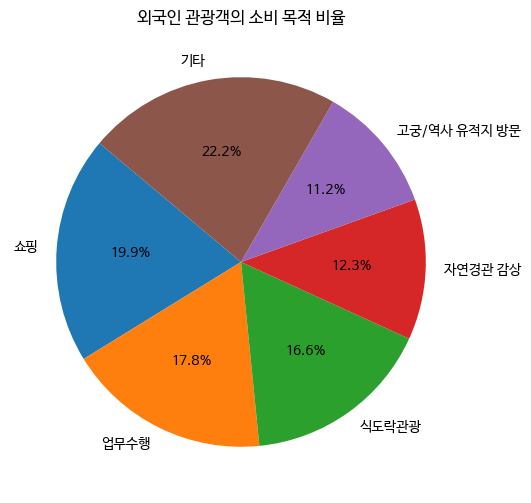

In [ ]:
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic')

# 데이터 생성
consumption_data = {
    "카테고리": ["쇼핑", "업무수행", "식도락관광", "자연경관 감상", "고궁/역사 유적지 방문", "기타"],
    "비율 (%)": [19.9, 17.8, 16.6, 12.3, 11.2, 22.2]
}

# 데이터프레임으로 변환
consumption_df = pd.DataFrame(consumption_data)


plt.figure(figsize=(8, 6))
plt.pie(consumption_df["비율 (%)"], labels=consumption_df["카테고리"], autopct="%1.1f%%", startangle=140)
plt.title("외국인 관광객의 소비 목적 비율")
plt.show()


In [ ]:
# Raw Data loading
df = pd.read_csv("/content/drive/MyDrive/[AI 웹서비스 스쿨]/[머신러닝]/data/project1/외래관광객조사_2023_데이터.txt", encoding="euc-kr", delimiter = '\t',low_memory=False)
# df.columns = ['순위', '지점', '인구', '비율']

display(df.head(5), df.shape)

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.099893
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.333757
2,8.0,2.0,2.0,5.0,1,5,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.838755
3,10.0,1.0,1.0,NaN,1,3,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.272342
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.434506


(16196, 365)

In [ ]:
# 항목 별 값 조회
columns_value_df= pd.read_excel('/content/drive/MyDrive/[AI 웹서비스 스쿨]/[머신러닝]/data/project1/외래관광객조사_2023_항목정의서.xlsx', sheet_name=1)
# display(columns_value_df.head(5))

indices = columns_value_df[columns_value_df['항목ID'].notnull()].index.tolist()

# 구간 별 동일값 설정
for i in range(len(indices)):
    # index 설정
    start_idx = indices[i]
    end_idx = indices[i + 1] if i + 1 < len(indices) else len(columns_value_df)

    # 각 구간에 동일한 값 설정
    columns_value_df.loc[start_idx:end_idx-1, '항목ID'] = columns_value_df.loc[start_idx, '항목ID']
    columns_value_df.loc[start_idx:end_idx-1, '항목명'] = columns_value_df.loc[start_idx, '항목명']
    columns_value_df.loc[start_idx:end_idx-1, '변수명'] = columns_value_df.loc[start_idx, '변수명']

display(columns_value_df)

,항목ID,항목명,변수명,코드값,코드명,비고
0,3.0,한국 방문횟수(카테고리),RVIT,1,1회,NaN
1,3.0,한국 방문횟수(카테고리),RVIT,2,2회,NaN
2,3.0,한국 방문횟수(카테고리),RVIT,3,3회,NaN
3,3.0,한국 방문횟수(카테고리),RVIT,4,4회 이상,NaN
4,3.0,한국 방문횟수(카테고리),RVIT,5,재방문,NaN
...,...,...,...,...,...,...
6384,363.0,방한횟수별,D_NUM,3,3회,NaN
6385,363.0,방한횟수별,D_NUM,4,4회 이상,NaN
6386,364.0,여행형태별,D_GUB,1,개별여행,분석변수
6387,364.0,여행형태별,D_GUB,2,AIR-TEL,NaN


In [ ]:
# 데이터 전처리
df.fillna(-1, inplace=True)

In [ ]:
# 대만 방한 여행객 데이터
Taiwan_df = df[df['D_NAT'] == 3]
# Taiwan_df.info()
# print(Taiwan_df.shape) # row: 1263, col: 365

pd.set_option('display.max_columns', 274)  # 모든 열을 출력하도록 설정
pd.set_option("display.max_rows", 274)     # 모든 행을 출력하도록 설정

display(Taiwan_df.head(3))

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,Q2a2,Q2a3,Q2a_dk,Q2_1a1,Q2_1a2,Q2_1a3,Q3_1a1,Q3_1a2,Q3_1a3,Q3_2a1,Q3_2a2,Q3_2a3,Q4a1,Q4a2,Q4a3,Q4a_dk,Q4_1a1,Q4_1a2,Q4_1a3,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk,Q5,Q5_1a01,Q5_1a02,Q5_1a03,Q5_1a04,Q5_1a05,Q5_1a06,Q5_1a07,Q5_1a08,Q5_1a09,Q5_1a10,Q5_1a99,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,MQ7_1,MQ7_1제외,MQ7_2,MQ7_1$15제외,MQ7_1제외$15제외,RQ7_1,RQ7_1제외,RQ7_2,RQ7_1$15제외,RQ7_1제외$15제외,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,Q8_1a1,Q8_1a2,Q8_1a3,Q9_1_1,Q9_1_2,Q9_1_3,Q9_1_4,Q9_1_5,Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17,KWON1,KWON2,KWON3,KWON4,KWON5,KWON6,KWON7,KWON8,KWONA1,KWONA2,KWONA3,KWONB1,KWONB2,M박HAP,M일HAP,M일HAP_61,R1일HAP,서울박TOT,경기박TOT,인천박TOT,강원박TOT,대전박TOT,충북박TOT,충남박TOT,세종박TOT,경북박TOT,경남박TOT,대구박TOT,울산박TOT,...,MDAY전체TOT_RAW61,MDAY전체_개별국제교통비제외,MDAY전체TOT_RAW61항공제외2,RDAY전체,RDAY전체TOT_RAW2,RDAY전체TOT_RAW61,RDAY전체_개별국제교통비제외,RDAY전체TOT_RAW61항공제외2,MDAY개별대체,MDAY에어대체,MDAY단체대체,MDAY개별61대체,MDAY에어61대체,MDAY단체61대체,MDAY개별61항공제외대체,MDAY에어61항공제외대체,MDAY단체61항공제외대체,RDAY개별대체,RDAY에어대체,RDAY단체대체,RDAY개별61대체,RDAY에어61대체,RDAY단체61대체,RDAY개별61항공제외대체,RDAY에어61항공제외대체,RDAY단체61항공제외대체,여행사1인대체,가이드1인대체,숙박비1인대체,음식점1인대체,식음료1인대체,국제한국1인대체,국제국외1인대체,국제수상1인대체,한국한국1인대체,한국국외1인대체,한국수상1인대체,한국철도1인대체,한국도로1인대체,대여서1인대체,유류비1인대체,문화서1인대체,오락및1인대체,쇼핑비1인대체,데이터1인대체,치료및1인대체,미용서1인대체,기타비1인대체,C여행사1인대체,C가이드1인대체,C숙박비1인대체,C음식점1인대체,C식음료1인대체,C국제한국1인대체,C국제국외1인대체,C국제수상1인대체,C한국한국1인대체,C한국국외1인대체,C한국수상1인대체,C한국철도1인대체,C한국도로1인대체,C대여서1인대체,C유류비1인대체,C문화서1인대체,C오락및1인대체,C쇼핑비1인대체,C데이터1인대체,C치료및1인대체,C미용서1인대체,C기타비1인대체,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,MQ10_2b07,MQ10_2b08,MQ10_2b09,MQ10_2b10,MQ10_2b11,MQ10_2b12,MQ10_2b13,Q10_3a1,Q10_3a2,Q10_3a3,Q11,Q12a01,Q12a02,Q12a03,Q12a04,Q12a05,Q12a06,Q12a07,Q12a08,Q12a09,Q12a10,Q12a11,Q12a12,Q12a13,Q12a14,Q12a15,Q12a16,Q12a17,Q12a18,Q12a19,Q12a20,Q12a21,Q12a22,Q12a23,Q12a24,Q12a25,Q12a26,Q13,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,8.0,2.0,-1.0,2.0,-1.0,-1.0,1.0,7.0,2.0,6.0,10.0,2.0,1.0,4.0,7.0,-1.0,2.0,5.0,6.0,8.0,6.0,-1.0,-1.0,2,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8,1.0,2.0,11040.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,1.0,2.0,26.0,27.0,27.0,4.0,24.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,60.51,40.49,40.49,2.0,2.0,2.0,1.0,1.0,60.51,-1.0,-1.0,60.51,-1.0,-1.0,40.49,-1.0,-1.0,2.0,-1.0,-1.0,2.0,-1.0,-1.0,1.0,-1.0,-1.0,0.0,0.0,123.53,308.82,46.32,540.43,0.0,0.0,0.0,0.0,0.0,54.04,77.2,0.0,0.0,23.16,0.0,386.02,20.07,54.04,0.0,0.0,1.0,1.0,3.0,4.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,1.0,4.0,2.0,3.0,1.0,1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,40.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,-1.0,5,5.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5,5,5,5,5,5,5,5,5,5,-1.0,5,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.099893
9,20.0,1.0,1.0,-1.0,1,1,7.0,1.0,9.0,1.0,6.0,5.0,-1.0,5.0,4.0,10.0,7.0,2.0,1.0,10.0,6.0,2.0,1.0,3.0,4.0,-1.0,2.0,1.0,5.0,2.0,1.0,-1.0,-1.0,3,1.0,2.0,3.0,4.0,5.0,-1.0,-1.0,8.0,9.0,-1.0,-1,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,-1.0,-1.0,2.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,3.0,1.0,42001.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,1.0,2.0,7.0,8.0,8.0,3.0,7.0,-1.0,-1.0,0

In [ ]:
# 시각화 처리를 위한 값 대체

mapping_dict = {col: columns_value_df[columns_value_df['변수명'] == col].set_index('코드값')['코드명'].to_dict()
                for col in columns_value_df['변수명'].unique()}
# 매핑 딕셔너리를 사용해 각 열에 대해 매핑 적용
for col, mapping in mapping_dict.items():
    if col in Taiwan_df.columns:
        Taiwan_df.loc[:, col] = Taiwan_df[col].map(mapping).fillna(Taiwan_df[col])

In [ ]:
# 방한하는 나이, 성별, 연령대 분석

# 성별, 연령, 목적, 방한 횟수, 그외 ...
info_df = Taiwan_df[['D_SEX', 'D_AGE', 'XRVIT','Q7A','D_MOK', 'D_NUM', 'Q1','Q1_1a1', 'Q1_1a2', 'Q1_1a3', 'Q2a1', 'Q2a2', 'Q2a3', 'Q2a_dk', 'Q2_1a1', 'Q2_1a2', 'Q2_1a3', 'Q3_1a1', 'Q3_1a2', 'Q3_1a3', 'Q3_2a1', 'Q3_2a2', 'Q3_2a3', 'Q4a1', 'Q4a2', 'Q4a3', 'Q4a_dk', 'Q4_1a1', 'Q4_1a2', 'Q4_1a3', 'Q4_2a1', 'Q4_2a2', 'Q4_2a3', 'Q4_2a_dk','Q8_1a1','Q9_1_1','Q9_5A1','Q9_5A2','Q9_5A3','Q9_5A4','Q9_5A5','Q10_2a01','Q10_2a02','Q10_2a10','Q10_2a11','Q10_3a1','Q11','Q13','Q14'
]]

display(info_df[info_df['D_SEX'] == -1])

,D_SEX,D_AGE,XRVIT,Q7A,D_MOK,D_NUM,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,Q2a2,Q2a3,Q2a_dk,Q2_1a1,Q2_1a2,Q2_1a3,Q3_1a1,Q3_1a2,Q3_1a3,Q3_2a1,Q3_2a2,Q3_2a3,Q4a1,Q4a2,Q4a3,Q4a_dk,Q4_1a1,Q4_1a2,Q4_1a3,Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk,Q8_1a1,Q9_1_1,Q9_5A1,Q9_5A2,Q9_5A3,Q9_5A4,Q9_5A5,Q10_2a01,Q10_2a02,Q10_2a10,Q10_2a11,Q10_3a1,Q11,Q13,Q14


In [ ]:
print(info_df.loc[info_df['Q1_1a1'] != -1, ['Q1_1a1']].shape)
print(info_df.loc[info_df['Q1_1a2'] != -1, ['Q1_1a2']].shape)
print(info_df.loc[info_df['Q1_1a3'] != -1, ['Q1_1a3']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q1']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q3_1a1']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q3_1a2']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q3_1a3']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q4a1']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q4a2']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q4a3']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q4_1a1']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q4_1a2']].shape)
print(info_df.loc[info_df['Q1'] != -1, ['Q4_1a3']].shape)



(1116, 1)
(923, 1)
(693, 1)
(1263, 1)
(1263, 1)
(1263, 1)
(1263, 1)
(1263, 1)
(1263, 1)
(1263, 1)
(1263, 1)
(1263, 1)
(1263, 1)


<Axes: xlabel='[문1-1. 한국여행 관심 계기_1순위]', ylabel='[명]'>

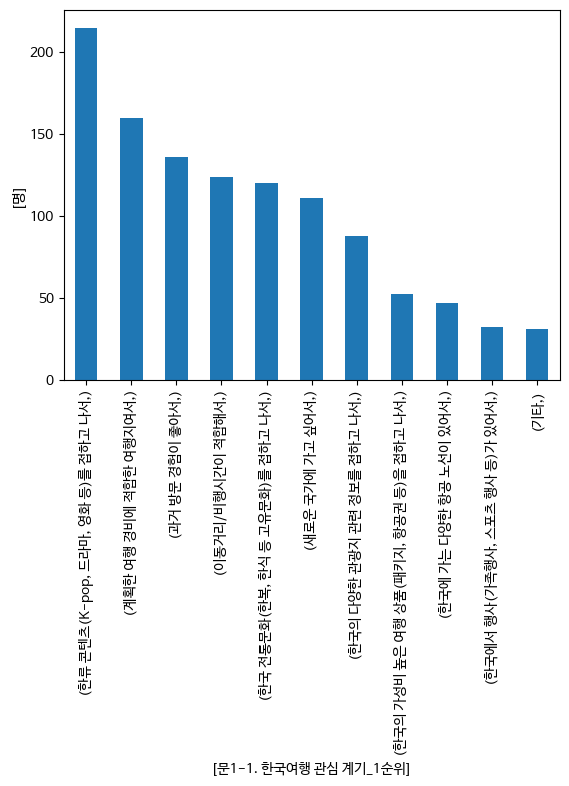

In [ ]:
# 관심 계기 1순위 시각화
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

info_df.loc[info_df['Q1_1a1'] != -1, ['Q1_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a1', '항목명'].head(1).values
)

<Axes: xlabel='[문1-1. 한국여행 관심 계기_2순위]', ylabel='[명]'>

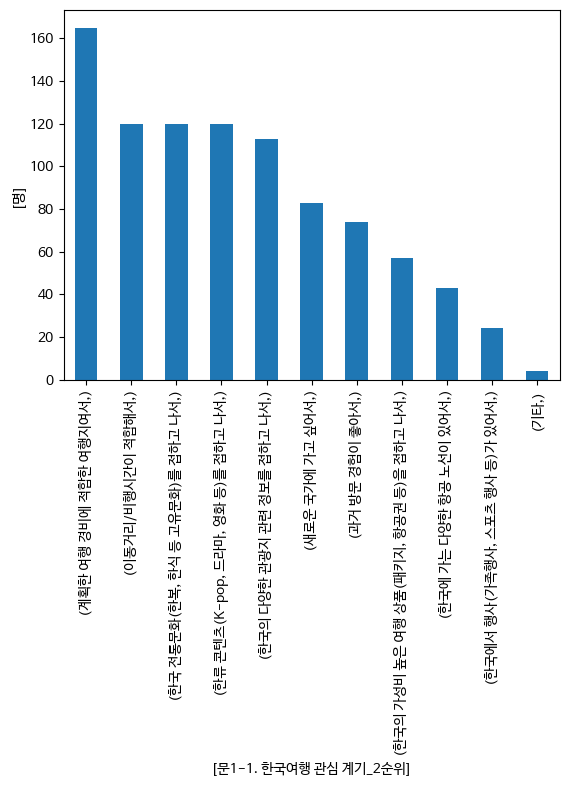

In [ ]:
# 관심 계기 2순위 시각화
info_df.loc[info_df['Q1_1a2'] != -1, ['Q1_1a2']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a2', '항목명'].head(1).values
)

<Axes: xlabel='[문1-1. 한국여행 관심 계기_3순위]', ylabel='[명]'>

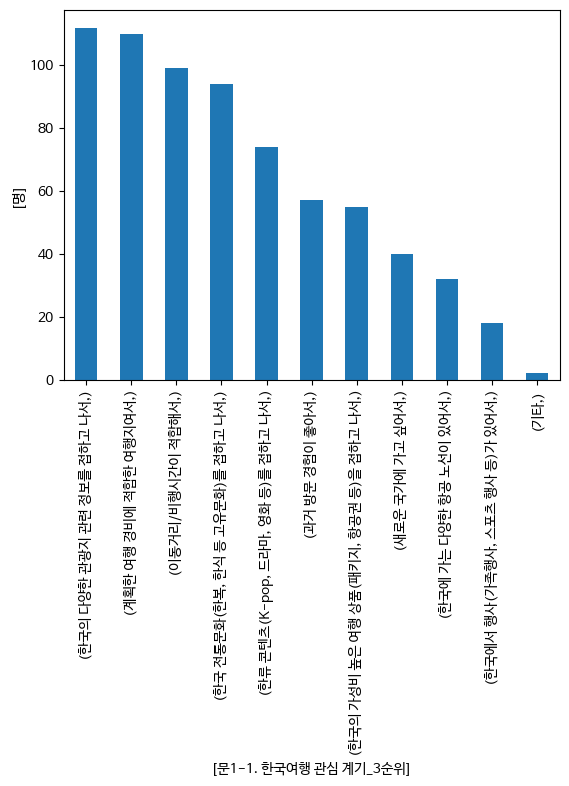

In [ ]:
# 관심 계기 3순위 시각화
info_df.loc[info_df['Q1_1a3'] != -1, ['Q1_1a3']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1_1a3', '항목명'].head(1).values
)

<Axes: xlabel='[문1. 주요 방한 목적]', ylabel='[명]'>

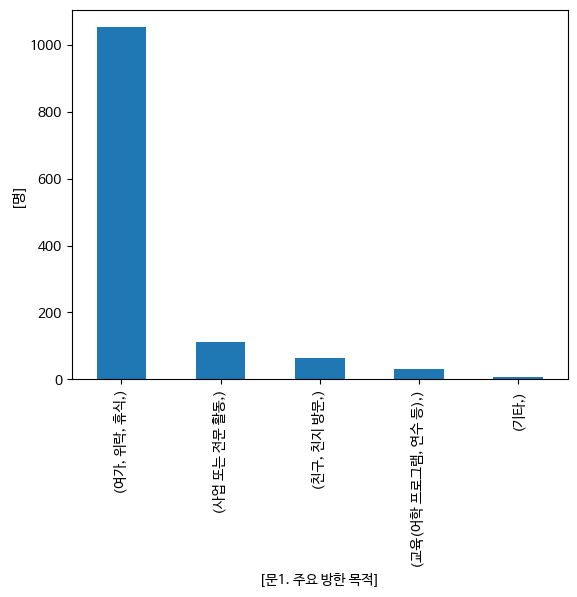

In [ ]:
# 주요 방한 목적
info_df.loc[info_df['Q1'] != -1, ['Q1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q1', '항목명'].head(1).values
)

<Axes: xlabel='[문3-1. 고려한 관광활동_1순위]', ylabel='[명]'>

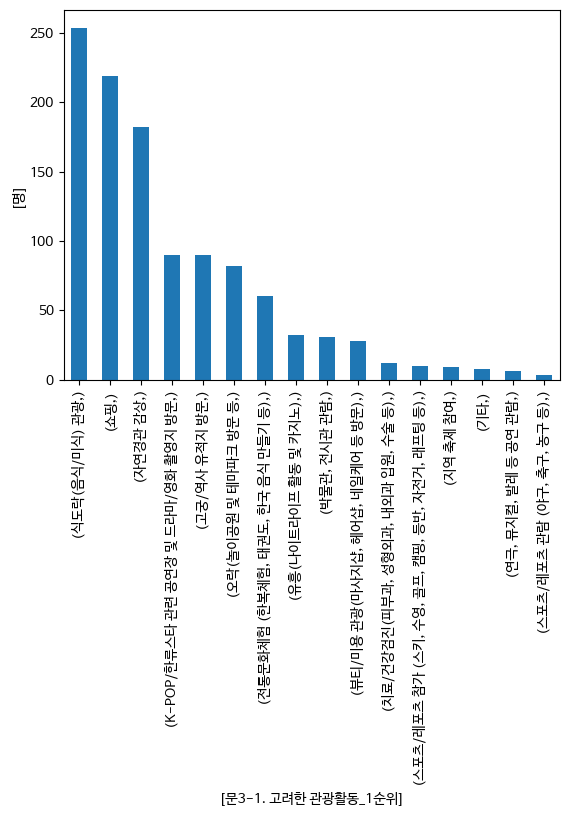

In [ ]:
# 고려한 방한 활동 1순위
info_df.loc[info_df['Q3_1a1'] != -1, ['Q3_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q3_1a1', '항목명'].head(1).values
)

<Axes: xlabel='[문3-1. 고려한 관광활동_2순위]', ylabel='[명]'>

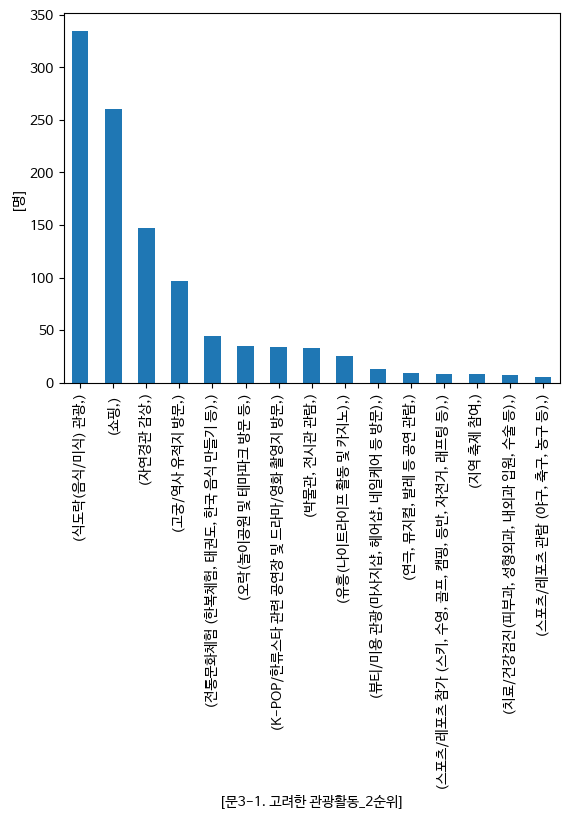

In [ ]:
# 고려한 방한 활동 2순위
info_df.loc[info_df['Q3_1a2'] != -1, ['Q3_1a2']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q3_1a2', '항목명'].head(1).values
)

<Axes: xlabel='[문3-1. 고려한 관광활동_3순위]', ylabel='[명]'>

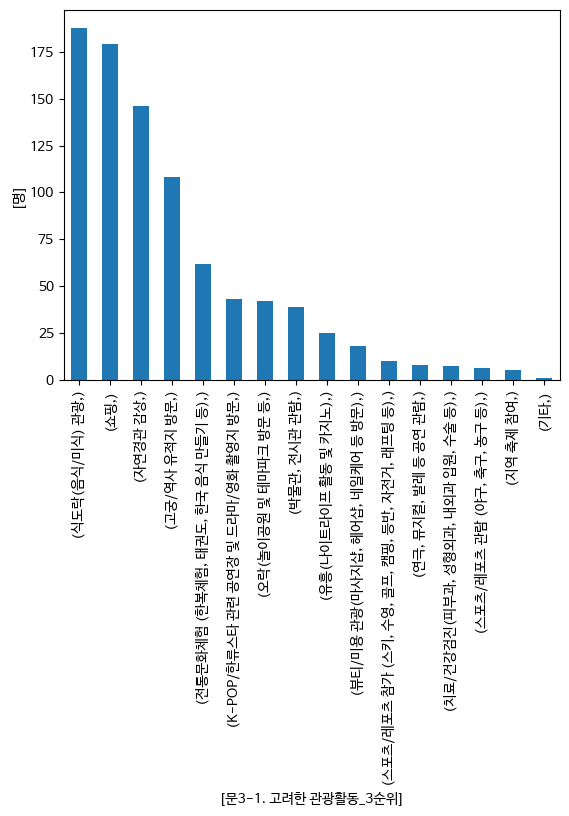

In [ ]:
# 고려한 방한 활동 3순위
info_df.loc[info_df['Q3_1a3'] != -1, ['Q3_1a3']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q3_1a3', '항목명'].head(1).values
)

<Axes: xlabel='[문4. 여행 전 한국 관련 정보 수집 경로_1순위]', ylabel='[명]'>

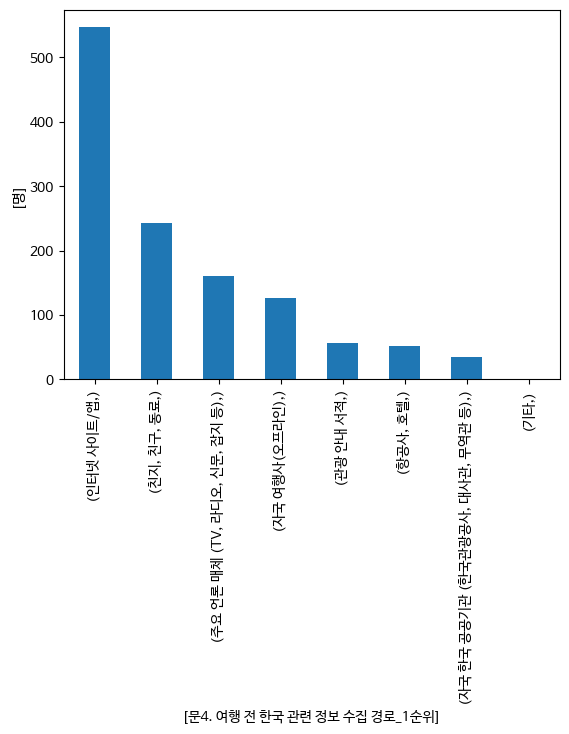

In [ ]:
# 여행 전 한국 관련 정보 수집 경로 1순위
info_df.loc[info_df['Q4a1'] != -1, ['Q4a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4a1', '항목명'].head(1).values
)

<Axes: xlabel='[문4. 여행 전 한국 관련 정보 수집 경로_2순위]', ylabel='[명]'>

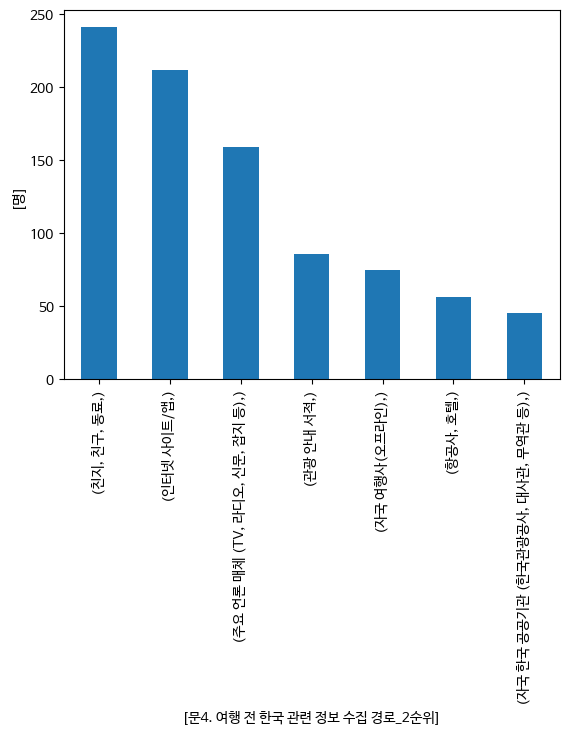

In [ ]:
# 여행 전 한국 관련 정보 수집 경로 2순위
info_df.loc[info_df['Q4a2'] != -1, ['Q4a2']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4a2', '항목명'].head(1).values
)

<Axes: xlabel='[문4. 여행 전 한국 관련 정보 수집 경로_3순위]', ylabel='[명]'>

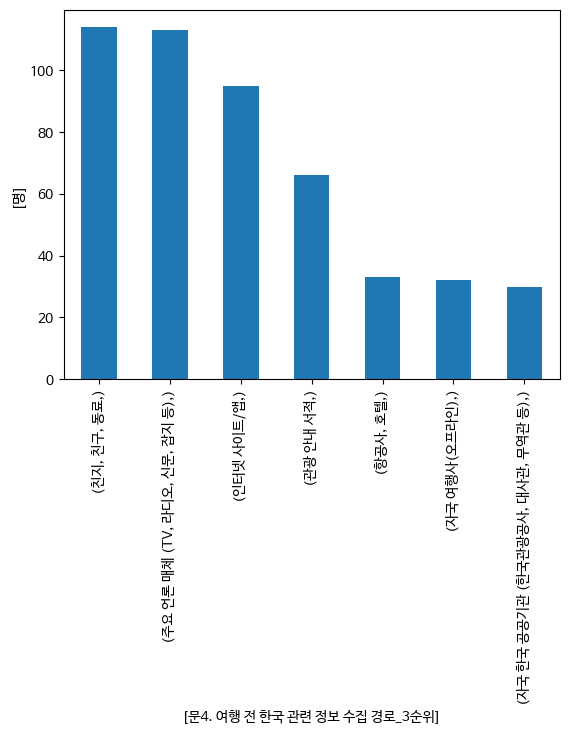

In [ ]:
# 여행 전 한국 관련 정보 수집 경로 3순위
info_df.loc[info_df['Q4a3'] != -1, ['Q4a3']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4a3', '항목명'].head(1).values
)

<Axes: xlabel='[문4-1. 주로 이용한 사이트_1순위]', ylabel='[명]'>

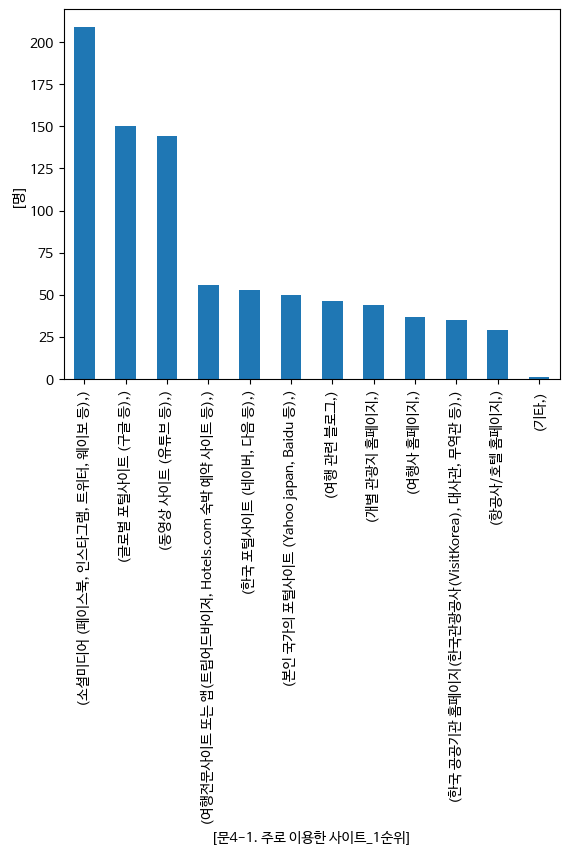

In [ ]:
# 여행 전 한국 관련 정보 수집 경로 3순위
info_df.loc[info_df['Q4_1a1'] != -1, ['Q4_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4_1a1', '항목명'].head(1).values
)

<Axes: xlabel='[문4-1. 주로 이용한 사이트_2순위]', ylabel='[명]'>

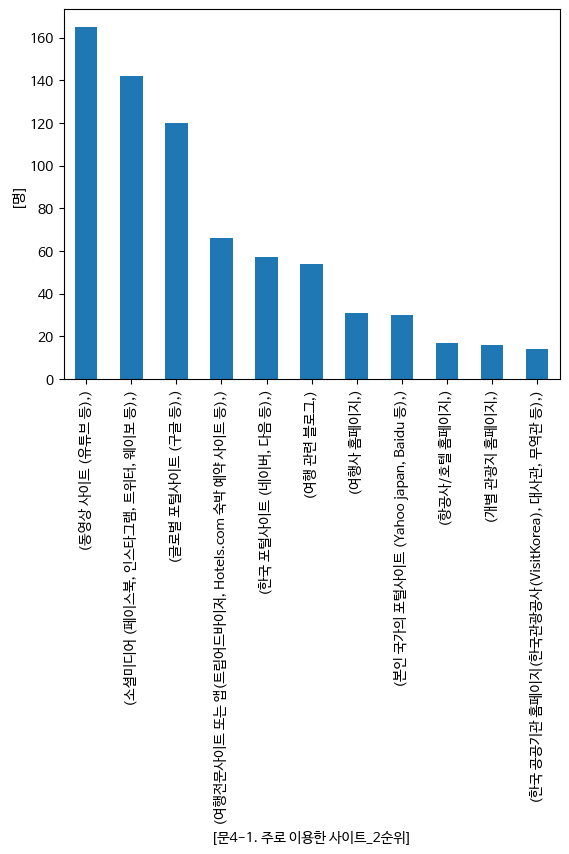

In [ ]:
# 여행 전 한국 관련 정보 수집 경로 3순위
info_df.loc[info_df['Q4_1a2'] != -1, ['Q4_1a2']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4_1a2', '항목명'].head(1).values
)

<Axes: xlabel='[문4-1. 주로 이용한 사이트_3순위]', ylabel='[명]'>

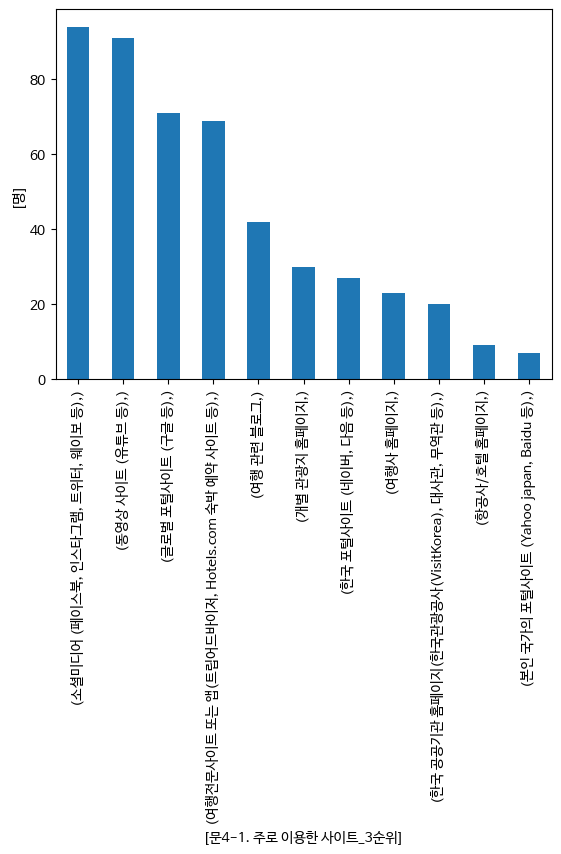

In [ ]:
# 여행 전 한국 관련 정보 수집 경로 3순위
info_df.loc[info_df['Q4_1a3'] != -1, ['Q4_1a3']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4_1a3', '항목명'].head(1).values
)

<Axes: xlabel='[성별]', ylabel='[명]'>

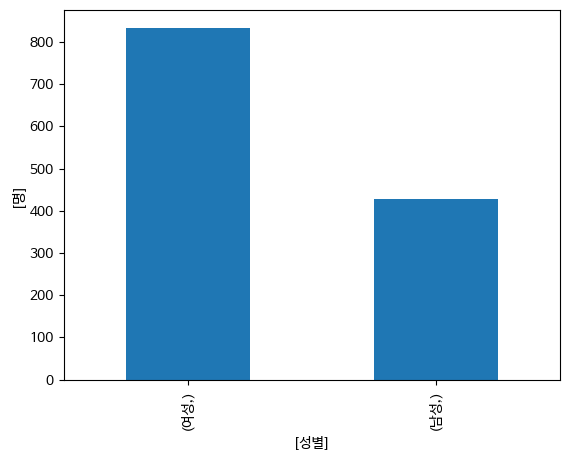

In [ ]:
# 성별 순위
info_df.loc[info_df['D_SEX'] != -1, ['D_SEX']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'D_SEX', '항목명'].head(1).values
)

<Axes: xlabel='[연령별]', ylabel='[명]'>

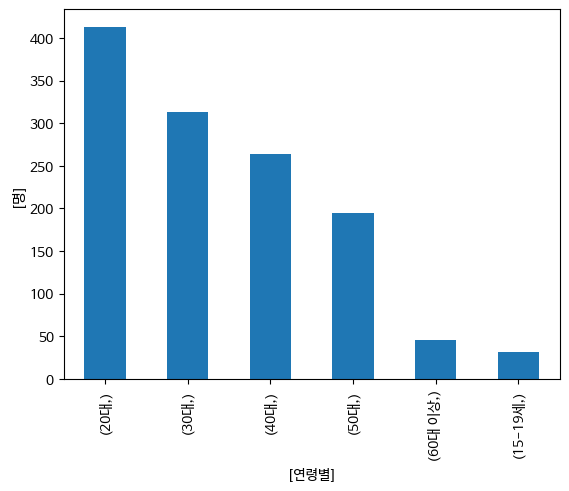

In [ ]:
# 나이 순위
info_df.loc[info_df['D_AGE'] != -1, ['D_AGE']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'D_AGE', '항목명'].head(1).values
)

<Axes: xlabel='[한국 방문횟수(재방문)]', ylabel='[명]'>

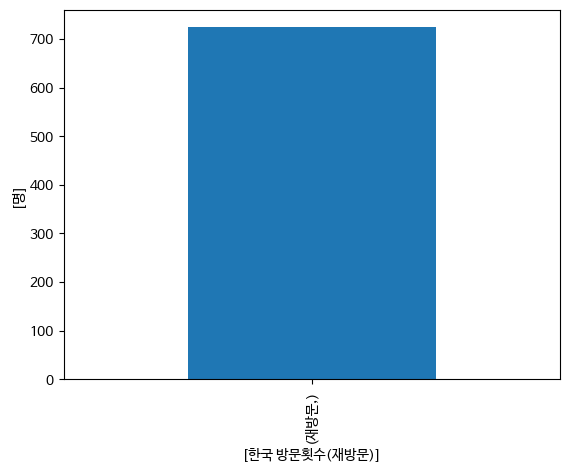

In [ ]:
# 재방문 순위
info_df.loc[info_df['XRVIT'] != -1, ['XRVIT']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'XRVIT', '항목명'].head(1).values
)

In [ ]:
# 전체 데이터 수
total_count = info_df.shape[0]

# XRVIT != -1인 데이터 수
filtered_count = info_df.loc[info_df['XRVIT'] != -1].shape[0]

# 비율 계산 # 도움
percentage = (filtered_count / total_count) * 100
print(f"XRVIT != -1인 데이터의 비율: {percentage:.2f}%")


XRVIT != -1인 데이터의 비율: 57.32%


<Axes: xlabel='[문4-1. 주로 이용한 사이트_1순위]', ylabel='[명]'>

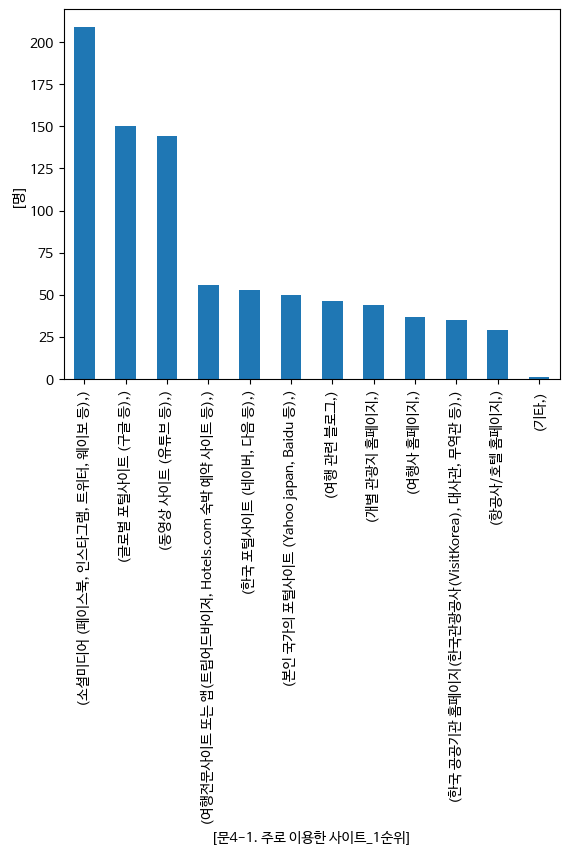

In [ ]:
# 주로 이용한 사이트
info_df.loc[info_df['Q4_1a1'] != -1, ['Q4_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4_1a1', '항목명'].head(1).values
)

<Axes: xlabel='[문2. 방문을 고려한 아시아 국가_1순위]', ylabel='[명]'>

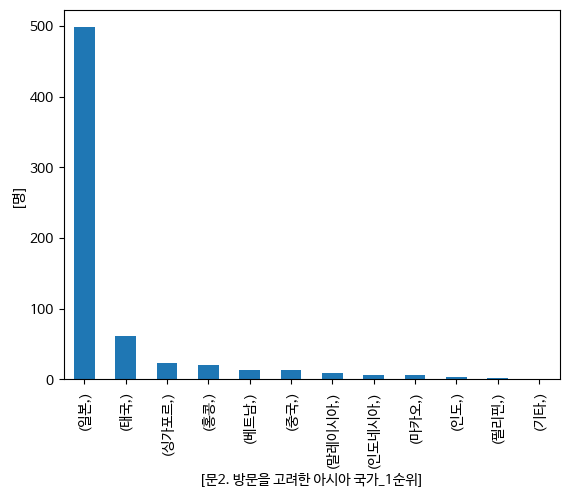

In [ ]:
# 방문을 고려한 아시아 국가
info_df.loc[info_df['Q2a1'] != -1, ['Q2a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q2a1', '항목명'].head(1).values
)

<Axes: xlabel='[문4-2. 부족했던 정보_1순위]', ylabel='[명]'>

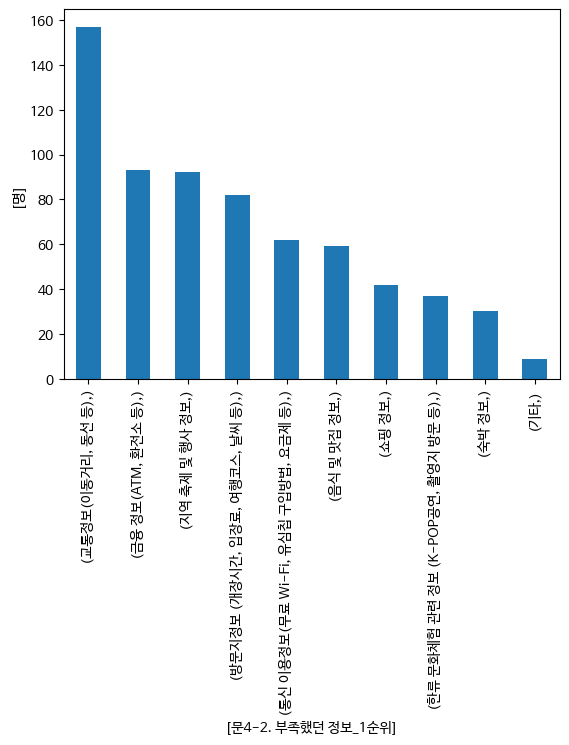

In [ ]:
# 부족했던 정보
info_df.loc[info_df['Q4_2a1'] != -1, ['Q4_2a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q4_2a1', '항목명'].head(1).values
)

In [ ]:
# 동반자 유무
print(info_df['Q7A'].value_counts(dropna=False))

Q7A
동반자 있음    1065
동반자 없음     198
Name: count, dtype: int64
동반자와 온 비율: 0.00%
혼자 온 비율: 0.00%


<Axes: xlabel='[문8-1. 만족한 활동_1순위]', ylabel='[명]'>

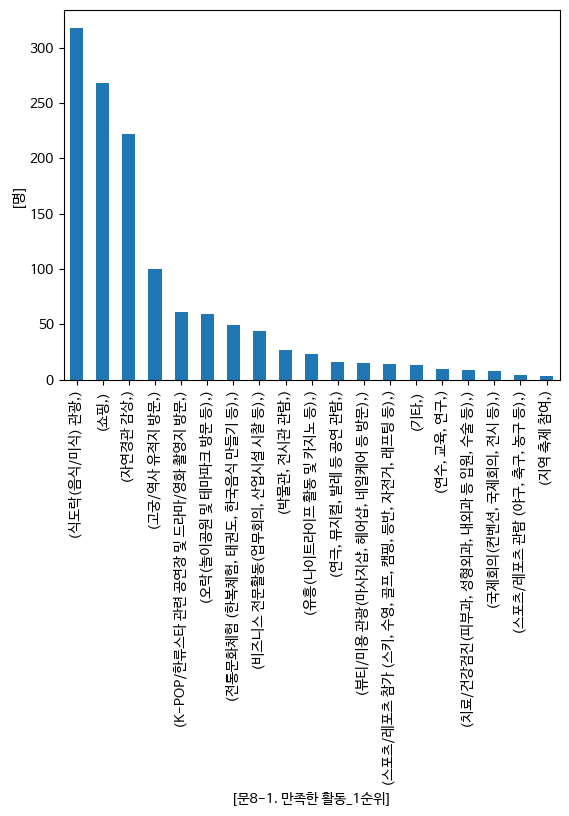

In [ ]:
# 만족한 활동
info_df.loc[info_df['Q8_1a1'] != -1, ['Q8_1a1']].value_counts().plot.bar(
    ylabel=['명'],
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q8_1a1', '항목명'].head(1).values
)

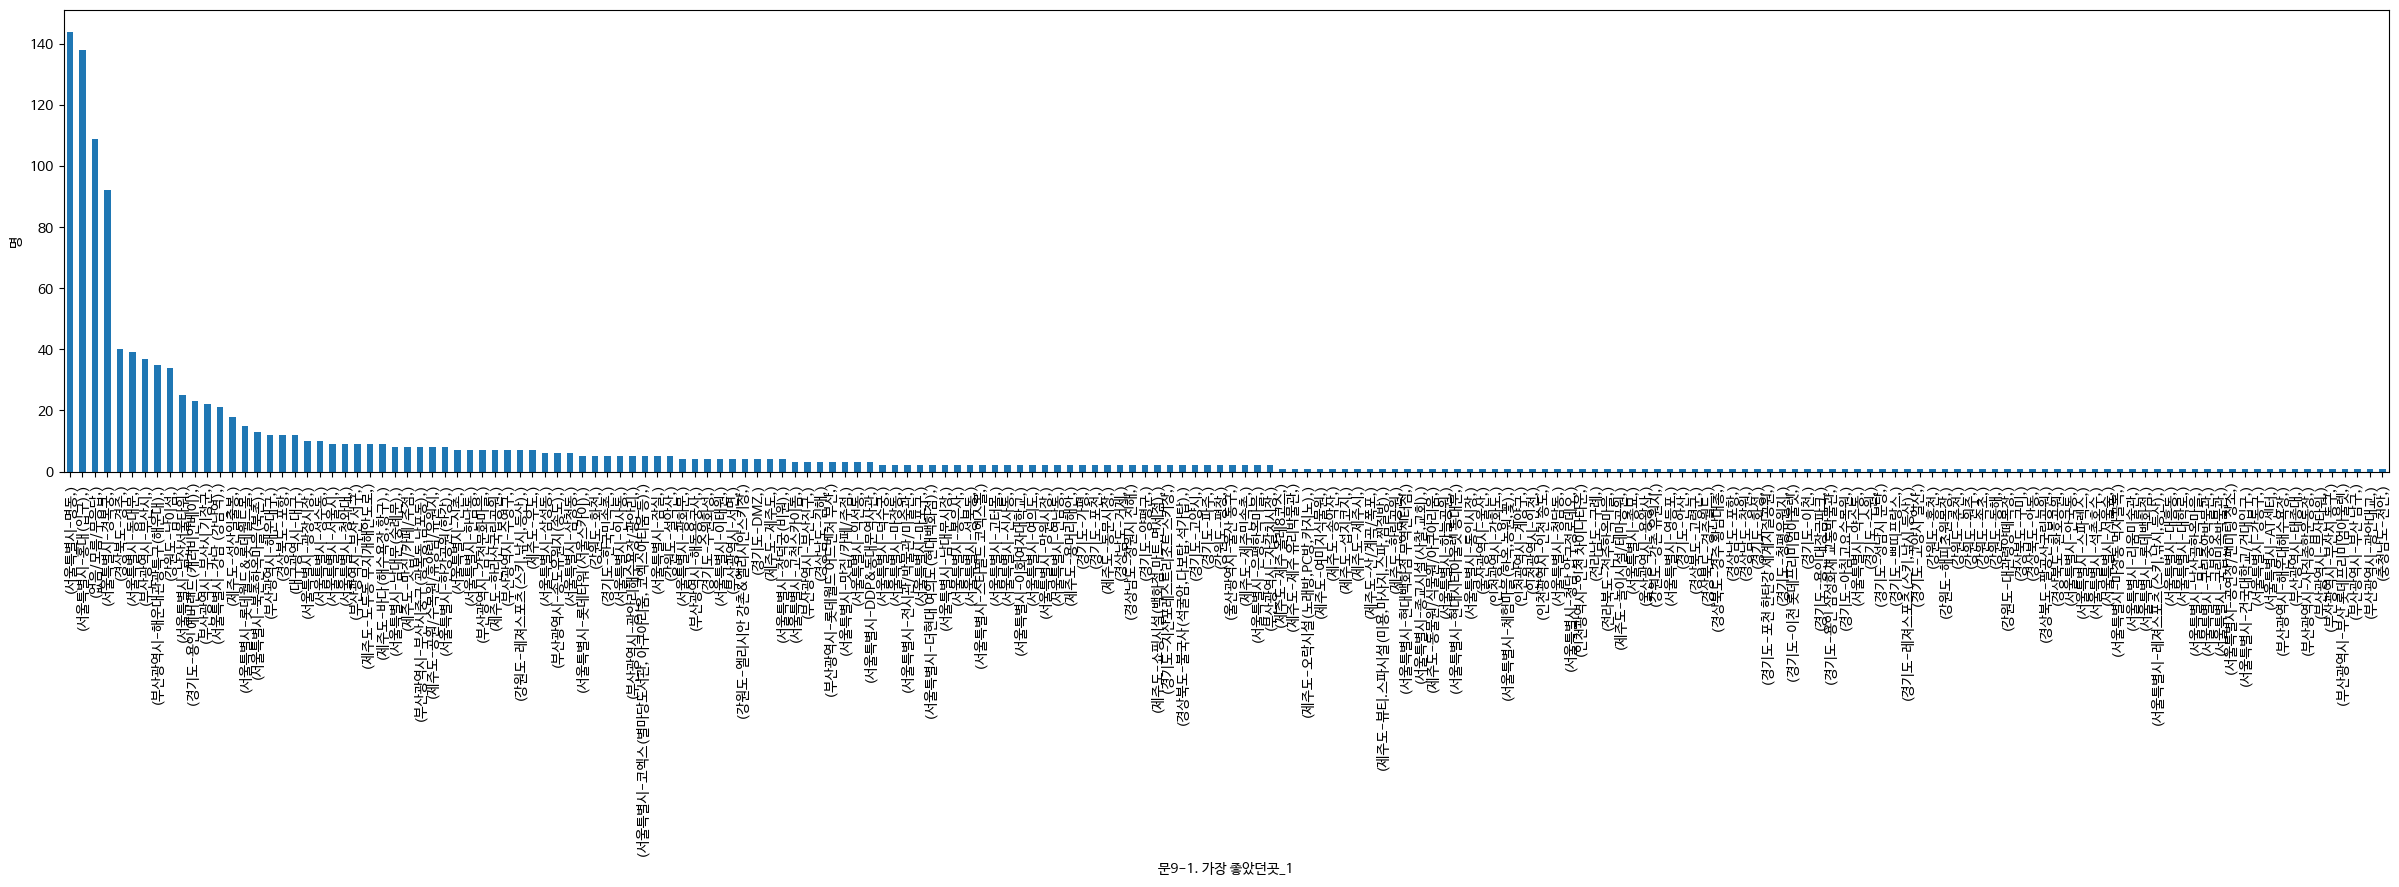

In [ ]:
# 가장 좋았던 곳
plt.figure(figsize=(30, 6))


info_df.loc[info_df['Q9_1_1'] != -1, ['Q9_1_1']].value_counts().plot.bar(
    ylabel='명',
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q9_1_1', '항목명'].head(1).values[0]
)

plt.show()

In [ ]:
# 주요 숙박
# print(info_df['Q9_5A1'].value_counts(dropna=False))

# 쇼핑항목
print(info_df['Q10_2a02'].value_counts(dropna=False))

Q10_2a02
 식료품(김치, 김, 과자 등)    810
-1.0                 453
Name: count, dtype: int64


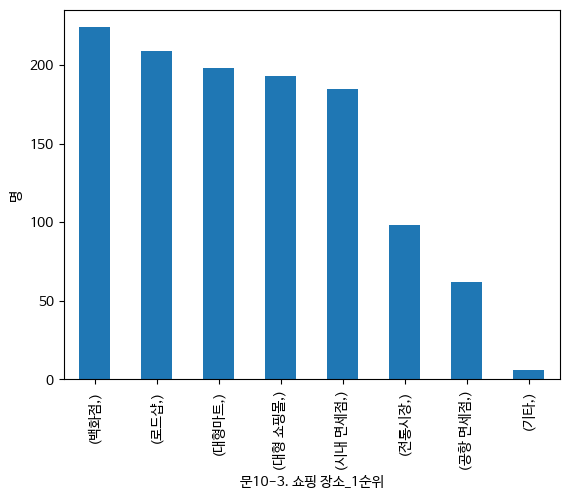

In [ ]:
info_df.loc[info_df['Q10_3a1'] != -1, ['Q10_3a1']].value_counts().plot.bar(
    ylabel='명',
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q10_3a1', '항목명'].head(1).values[0]
)

plt.show()

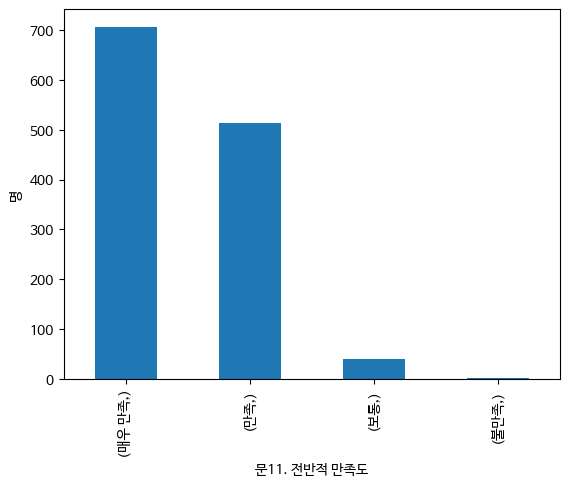

Q11
매우 만족    707
만족       514
보통        40
불만족        2
Name: count, dtype: int64


In [ ]:
info_df.loc[info_df['Q11'] != -1, ['Q11']].value_counts().plot.bar(
    ylabel='명',
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q11', '항목명'].head(1).values[0]
)

plt.show()
print(info_df['Q11'].value_counts(dropna=False))

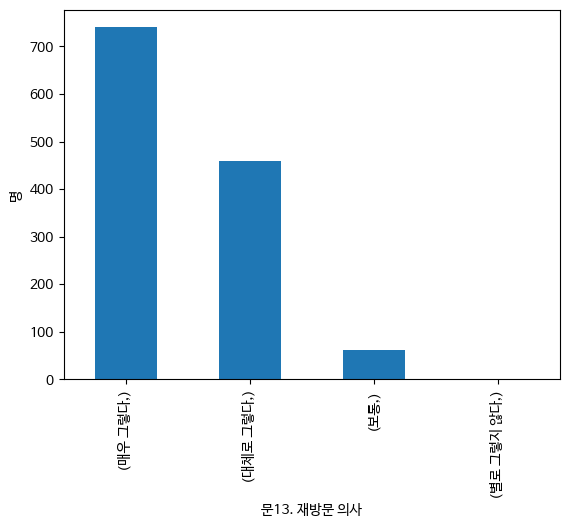

Q13
매우 그렇다       740
대체로 그렇다      460
보통            62
별로 그렇지 않다      1
Name: count, dtype: int64


In [ ]:
info_df.loc[info_df['Q13'] != -1, ['Q13']].value_counts().plot.bar(
    ylabel='명',
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q13', '항목명'].head(1).values[0]
)

plt.show()
print(info_df['Q13'].value_counts(dropna=False))

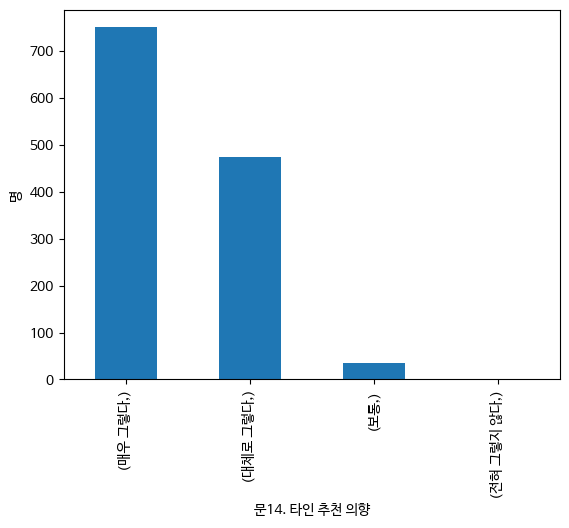

Q14
매우 그렇다       750
대체로 그렇다      475
보통            36
전혀 그렇지 않다      2
Name: count, dtype: int64


In [ ]:
info_df.loc[info_df['Q14'] != -1, ['Q14']].value_counts().plot.bar(
    ylabel='명',
    xlabel=columns_value_df.loc[columns_value_df['변수명'] == 'Q14', '항목명'].head(1).values[0]
)

plt.show()
print(info_df['Q14'].value_counts(dropna=False))

대만 2024 트렌드
20,30대 대만여행객 한국여행상품 1위 화장품.의류 2위 식품(카페,디저트에대한 관심이 높아지고있다)

방한 홍보
2024
k-관광 로드쇼 대만
케이팝, 드라마, 푸드, 뷰티, 패션 등 K-컬처에 관심이 많은 대만 청년을 타깃으로 30개 이상의 기관과 기업이 참여해 즐길 거리, 살 거리, 먹거리, 볼거리 등 다양한 한국 문화를 알리는 데 앞장섰다.

 ‘신라 한복 체험’ 이벤트를 통해 경북만이 가지고 있는 신라 문화유산을 홍보하여 수많은 관광객의 관심과 호응을 얻었다. 또한, 주사위 게임 이벤트를 통해 대만 MZ세대 및 가족 관광객들의 흥미를 유발함과 동시에 경북 상징 기념품을 증정하여 경북의 주요 관광명소를 효과적으로 홍보하였다.

 “대만은 한국 문화에 관심이 많을 뿐만 아니라 경북으로 가는 비행 노선이 많아 경북을 찾는 발길이 가장 많은 곳”으로 “앞으로 대만 관광객을 사로잡을 경북만의 특색있는 체험과 축제를 집중적으로 홍보하여 경북 관광 상품이 활성화 될 수 있도록 홍보하겠다”

무신사, 대만에서 K패션 성장 가능성 확인··· 2024 K-관광 로드쇼 참가 성료
https://newsroom.musinsa.com/newsroom-menu/2024-0911

에스네이처, 대만 ‘K-관광 로드쇼’ 참가
https://www.asiae.co.kr/article/2024100210374671850

편의점 CU, 대만서 열린 '2024 K-관광 로드쇼' 참가
https://www.yna.co.kr/view/AKR20240908013400030
2023

타이베이국제관광박람회(이하 ITF)
국내 지자체와 RTO, 여행업계 등 40개 기관과 함께 ‘2023-2024 한국방문의해’를 주요 테마로 65개 부스 규모의 한국관을 구성,한국관은 전통시장, 미식, 겨울 스포츠, 관광거점도시 등을 모티브로 구성, 넌버벌 공연단인 ‘점프’와 ‘두들팝’도 초청해 소비자들의 이목을 끌어 모았다. 또한 스탬프투어를 비롯해 포장마차, 인생네컷, 김밥·떡볶이 시식 등 방문객들을 위한 다양한 체험거리도 마련됐다. 한편, 18개 대만 여행사와 8개 국적 항공사가 한국관 상품 코너에서 방한 관광상품과 항공권 현장 판매를 진행한 결과 2,500여 건의 판매실적을 거두기도 했다.
